# Machine Learning Course - Project.

## Part 3: Association Rule Learning - Discovering Patterns

### Library Imports

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx # Create a directed graph
import matplotlib.pyplot as plt

#### Reading the data:

In [2]:
df = pd.read_csv('data/Groceries_dataset.csv')

In [15]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
# Group by Member_number and Date to create transactions
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

In [4]:
# Convert the transactions into a list of lists
transaction_list = transactions['itemDescription'].tolist()

In [5]:
# Display the first few transactions
print(transaction_list[:5])

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['whole milk', 'pastry', 'salty snack'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles'], ['soda', 'pickled vegetables']]


In [6]:
# Convert the transaction list into a one-hot encoded DataFrame
te = TransactionEncoder() 

In [7]:
# fitting
te_ary = te.fit(transaction_list).transform(transaction_list)

In [8]:
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [9]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)

In [10]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)

# Display the association rules
print(rules.head())

      antecedents     consequents  antecedent support  consequent support  \
0  (bottled beer)    (whole milk)            0.045312            0.157923   
1    (whole milk)  (bottled beer)            0.157923            0.045312   
2   (canned beer)    (whole milk)            0.046916            0.157923   
3    (whole milk)   (canned beer)            0.157923            0.046916   
4    (whole milk)  (citrus fruit)            0.157923            0.053131   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.007151    0.157817  0.999330               1.0 -0.000005    0.999874   
1  0.007151    0.045281  0.999330               1.0 -0.000005    0.999968   
2  0.006015    0.128205  0.811821               1.0 -0.001394    0.965912   
3  0.006015    0.038087  0.811821               1.0 -0.001394    0.990822   
4  0.007151    0.045281  0.852259               1.0 -0.001240    0.991778   

   zhangs_metric   jaccard  certainty  kulczynski  
0      -0.000702  0.03

In [14]:
# Sort rules by lift or confidence to find the strongest associations
sorted_rules = rules.sort_values(by='lift', ascending=False)
print(sorted_rules.head())

           antecedents         consequents  antecedent support  \
9        (frankfurter)  (other vegetables)            0.037760   
8   (other vegetables)       (frankfurter)            0.122101   
35            (yogurt)           (sausage)            0.085879   
34           (sausage)            (yogurt)            0.060349   
30           (sausage)              (soda)            0.060349   

    consequent support   support  confidence      lift  representativity  \
9             0.122101  0.005146    0.136283  1.116150               1.0   
8             0.037760  0.005146    0.042146  1.116150               1.0   
35            0.060349  0.005748    0.066926  1.108986               1.0   
34            0.085879  0.005748    0.095238  1.108986               1.0   
30            0.097106  0.005948    0.098560  1.014975               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
9   0.000536    1.016420       0.108146  0.033261   0.016154    0.08921

 frankfurter and other vegetables
 
 yogurt and sausage, with a lift value of 1.109.

#### Visualize Results Using Network Graphs

In [11]:
# Create a directed graph from the association rules
G = nx.DiGraph()

In [12]:
# Add edges to the graph
for _, rule in rules.iterrows():
    G.add_edge(rule['antecedents'], rule['consequents'], weight=rule['lift'])


C:\Users\Zein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Zein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Zein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


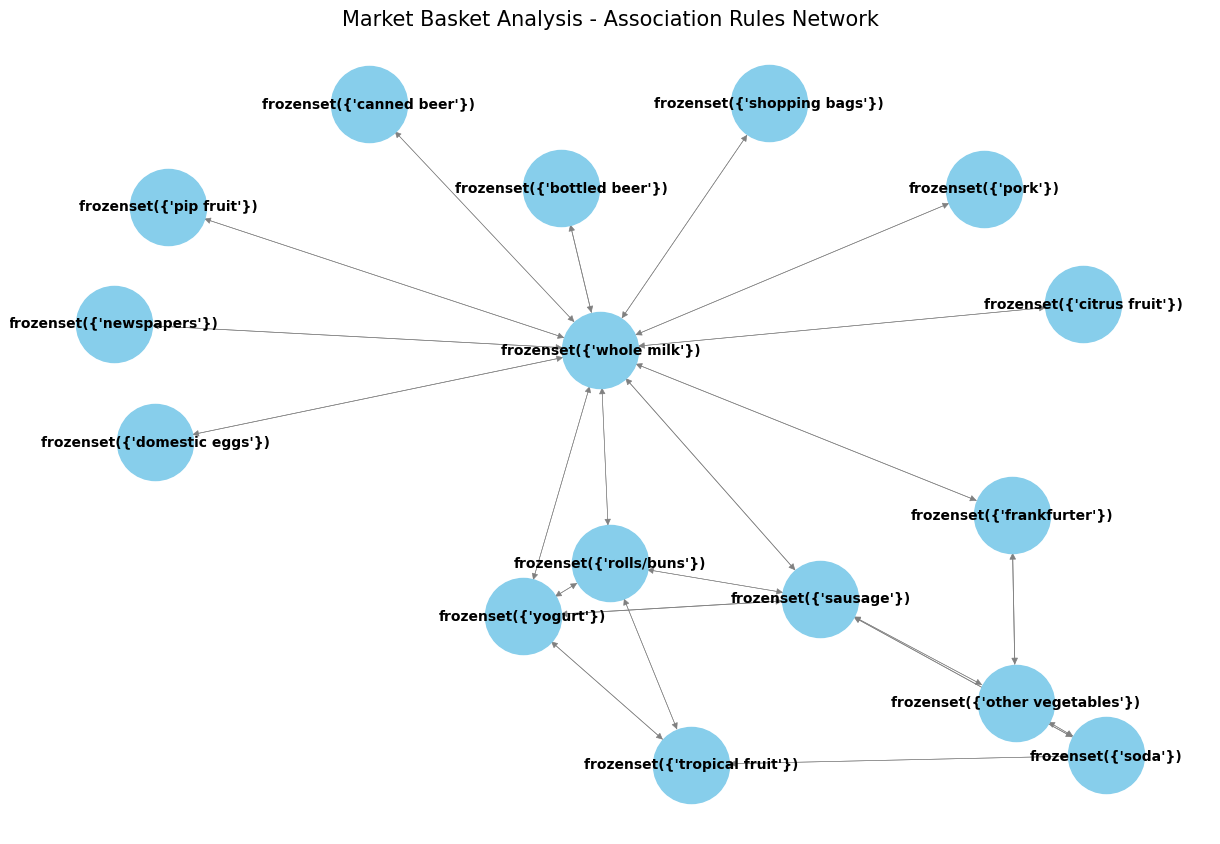

In [13]:
# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', width=[d['weight']*0.5 for (u, v, d) in G.edges(data=True)])
plt.title('Market Basket Analysis - Association Rules Network', fontsize=15)
plt.show()

Items like whole milk and yogurt may have a strong association, indicating that customers who buy one are likely to buy the other.

Sausage and rolls/buns are likely purchased together, suggesting a common use case.
Items like whole milk, yogurt, and rolls/buns appear frequently in the graph, indicating they are popular and often purchased together with other items.